In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import statistics as st
from astropy.io import ascii
import sys
import imp
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
imp.reload(freedrift)
# from scipy.io import FortranFile
# import struct

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [5]:
location =  % pwd
location

'/Users/H/INVERSE/Code_dev/NA_geo'

In [6]:
# constants
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 
fc   = 1.46e-4 

# going to pass N2a and rop ranges directly now

Ca     = 1.5e-3
ThetaA = np.deg2rad(0)
Co     = 5.5e-3
ThetaO = np.deg2rad(23) # original

# invert for thO and thA-thO
# # these replace for thO
# thA_min = ThetaO - np.deg2rad(90)
# thA_max = ThetaO + np.deg2rad(90)
# # these replace for thA-thO
# thO_min = (ThetaA - ThetaO) - np.deg2rad(90)
# thO_max = (ThetaA - ThetaO) + np.deg2rad(90)
# these replace for thO
thA_min =  - np.deg2rad(180)
thA_max =  + np.deg2rad(180)
# these replace for thA-thO
thO_min =  - np.deg2rad(180)
thO_max =  + np.deg2rad(180)


nansen_use = freedrift.nansen(Ca,Co)**2
rossby_use = freedrift.rossby_pp(Co)
n2a_min = nansen_use*1e-1
n2a_max = nansen_use*2e0
rop_min = rossby_use*1e-1
rop_max = rossby_use*4e0
# n2a_min = nansen_use-1e-4
# n2a_max = nansen_use+1e-4
# rop_min = rossby_use*1e-1
# rop_max = rossby_use*1e2
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)

3.32270069112e-05 0.0182282766358 0.000332270069112 0.000664540138224
16.25022151337941 162.5022151337941 650.0088605351764


In [35]:
# constants and ranges
nansen_use = 0.022**2
# nansen_use = 3.3e-4
rossby_use = 500
# rossby_use = 162
n2a_min = nansen_use*1e-3
n2a_max = nansen_use*2e0
# n2a_min = nansen_use*9e-1
# n2a_max = nansen_use*11e-1
rop_min = rossby_use*1e-3
rop_max = rossby_use*3e0
# rop_min = rossby_use*9e-1
# rop_max = rossby_use*11e-1
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)
# general inv parameters
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 

Ca_min = 1.0e-6
Ca_max = 2.0e-3
Co_min = 1.0e-3
Co_max = 6.0e-2

# invert for thO and thA-thO
# these replace for thO
thO_min = np.deg2rad(-179)
thO_max = np.deg2rad( 180)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 179)


Ca     = 1.5e-3
ThetaA = np.deg2rad(0)
Co     = 5.5e-3
ThetaO = np.deg2rad(23) # original
nansen_use = freedrift.nansen(Ca,Co)**2
rossby_use = freedrift.rossby_pp(Co)


4.839999999999999e-07 0.022 0.00048399999999999995 0.0009679999999999999
0.5 500 1500.0


In [36]:
nbals = 5
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
hice[0] = 1.0e-0
hifc[0] = hice[0]*fc
hice[1] = 1.0e-0
hifc[1] = hice[1]*fc
hice[2] = 0.9e-0
hifc[2] = hice[2]*fc
hice[3] = 0.9e-0
hifc[3] = hice[3]*fc
hice[4] = 1.0e-0
hifc[4] = hice[4]*fc

In [37]:
# changing to dimensional errors
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
ice_sig = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
ocn_mag = np.ndarray([nbals])
ocn_ang = np.ndarray([nbals])
ocn_sig = np.ndarray([nbals])
uocn = np.ndarray([nbals])
vocn = np.ndarray([nbals])
# set up wind and ocean
wind_mag[0] = 1.1
wind_ang[0] = np.deg2rad(0)
wind_sig[0] = 0.1*wind_mag[0]
uwind[0]    = wind_mag[0]*np.cos(wind_ang[0])
vwind[0]    = wind_mag[0]*np.sin(wind_ang[0])
ocn_mag[0]  = 0.1
ocn_ang[0]  = np.deg2rad(10)
ocn_sig[0] = 0.01*ocn_mag[0]  
uocn[0]     = ocn_mag[0]*np.cos(ocn_ang[0])
vocn[0]     = ocn_mag[0]*np.sin(ocn_ang[0])

wind_mag[1] = 2.1
wind_ang[1] = np.deg2rad(15)
wind_sig[1] = 0.1*wind_mag[1]
uwind[1]    = wind_mag[1]*np.cos(wind_ang[1])
vwind[1]    = wind_mag[1]*np.sin(wind_ang[1])
ocn_mag[1]  = 0.02
ocn_ang[1]  = np.deg2rad(-49)
ocn_sig[1] = 0.01*ocn_mag[1]
uocn[1]     = ocn_mag[1]*np.cos(ocn_ang[1])
vocn[1]     = ocn_mag[1]*np.sin(ocn_ang[1])

wind_mag[2] = 0.6
wind_ang[2] = np.deg2rad(110)
wind_sig[2] = 0.1*wind_mag[2]
uwind[2]    = wind_mag[2]*np.cos(wind_ang[2])
vwind[2]    = wind_mag[2]*np.sin(wind_ang[2])
ocn_mag[2]  = 0.06
ocn_ang[2]  = np.deg2rad(63)
ocn_sig[2] = 0.01*ocn_mag[2]
uocn[2]     = ocn_mag[2]*np.cos(ocn_ang[2])
vocn[2]     = ocn_mag[2]*np.sin(ocn_ang[2])

wind_mag[3] = 0.5
wind_ang[3] = np.deg2rad(12)
wind_sig[3] = 0.1*wind_mag[3]
uwind[3]    = wind_mag[3]*np.cos(wind_ang[3])
vwind[3]    = wind_mag[3]*np.sin(wind_ang[3])
ocn_mag[3]  = 0.03
ocn_ang[3]  = np.deg2rad(135)
ocn_sig[3] = 0.01*ocn_mag[3]
uocn[3]     = ocn_mag[3]*np.cos(ocn_ang[3])
vocn[3]     = ocn_mag[3]*np.sin(ocn_ang[3])

wind_mag[4] = 4.0
wind_ang[4] = np.deg2rad(1)
wind_sig[4] = 0.1*wind_mag[4]
uwind[4]    = wind_mag[4]*np.cos(wind_ang[4])
vwind[4]    = wind_mag[4]*np.sin(wind_ang[4])
ocn_mag[4]  = 0.001
ocn_ang[4]  = np.deg2rad(-114)
ocn_sig[4] = 0.1*ocn_mag[4]
uocn[4]     = ocn_mag[4]*np.cos(ocn_ang[4])
vocn[4]     = ocn_mag[4]*np.sin(ocn_ang[4])

# Ca_min = 1.0e-6
# Ca_max = 2.0e-3
# Co_min = 1.0e-3
# Co_max = 6.0e-2

In [302]:
# now generate arbitrary synthetic values
# generate wnd and geo and create the o_i
nbals = 10
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
geo_mag = np.ndarray([nbals])
geo_ang = np.ndarray([nbals])
ugeo = np.ndarray([nbals])
vgeo = np.ndarray([nbals])
for i in range(nbals):
    wind_mag[i] = np.random.normal(loc=6.0,scale=6)
#     wind_mag[i] = np.random.uniform(0,10.0)
    wind_mag[i] = np.max([wind_mag[i],0.5])
    wind_ang[i] = np.random.uniform(5,65)
    uwind[i]    = wind_mag[i]*np.cos(np.deg2rad(wind_ang[i]))
    vwind[i]    = wind_mag[i]*np.sin(np.deg2rad(wind_ang[i]))
    geo_mag[i]  = np.random.normal(loc=0.09,scale=0.04)
    geo_mag[i] = np.max([geo_mag[i],0.05])
#     geo_ang[i] = np.random.uniform(-45,135)
    geo_ang[i] = np.random.uniform(105,170)
    ugeo[i]     = geo_mag[i]*np.cos(np.deg2rad(geo_ang[i]))
    vgeo[i]     = geo_mag[i]*np.sin(np.deg2rad(geo_ang[i]))
    hice[i] = np.random.normal(loc=0.9,scale=0.3)
    hice[i] = np.max([hice[i],0.5])
    hifc[i] = hice[i]*fc

In [303]:
# changing to dimensional errors
# set up wind and ocean
wind_mag[0] = 7
wind_ang[0] = 20
uwind[0] = wind_mag[0]*np.cos(np.deg2rad(wind_ang[0]))
vwind[0] = wind_mag[0]*np.sin(np.deg2rad(wind_ang[0]))
geo_mag[0]  = 0.15
geo_ang[0] = 150
ugeo[0]     = geo_mag[0]*np.cos(np.deg2rad(geo_ang[0]))
vgeo[0]     = geo_mag[0]*np.sin(np.deg2rad(geo_ang[0]))
hice[0] = 1.0
hifc[0] = hice[0]*fc
ugeo[0],vgeo[0]

(-0.12990381056766581, 0.074999999999999983)

7.0 0.117246340592 0.15 0.0167494772275
11.1748771789 0.200476897219 0.05 0.0179399642617
9.67861881633 0.173991448478 0.0666797722914 0.017976888209
16.2798666725 0.292890367018 0.130670964426 0.0179909561246
16.6218534435 0.299682050854 0.07677250739 0.0180294003839
0.5 0.0275292000083 0.0636014972261 0.0550584000167
15.5792296396 0.281587709179 0.114787051671 0.0180745592493
7.26174012882 0.121528075031 0.110753280526 0.0167353930154
8.6263963762 0.148306226482 0.129450910634 0.0171921414244
9.09671331584 0.162728213018 0.0555047643491 0.0178886821391


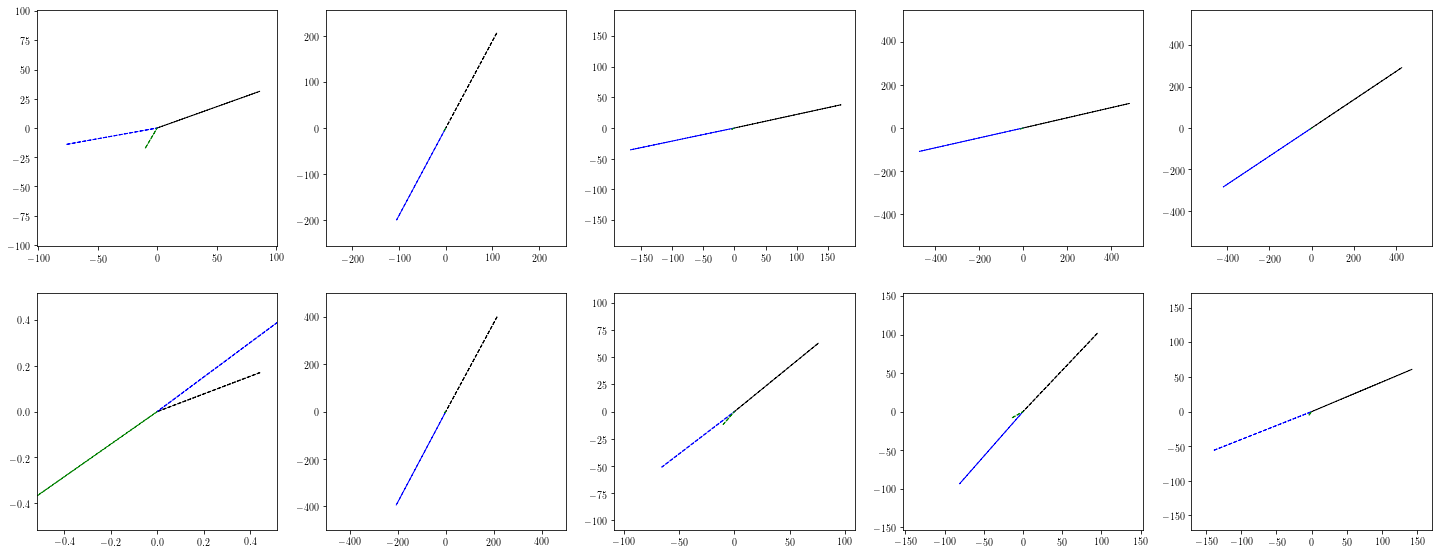

In [304]:
ice_ocn_mag = np.ndarray([nbals])
na2 = np.ndarray([nbals])
rop = np.ndarray([nbals])
thA = np.ndarray([nbals])
thO = np.ndarray([nbals])
o_i_mag = np.ndarray([nbals])
o_i_sig = np.ndarray([nbals])
geo_sig = np.ndarray([nbals])
uo_i = np.ndarray([nbals])
vo_i = np.ndarray([nbals])
sig_c = 0.00# plus/minus lever for random error
sig_w = 0.01
sig_i = 0.01
sig_g = 0.01
# problem 1

for i in range(nbals):
    Na2 = freedrift.nansen(Ca,Co)**2*np.random.normal(loc=1.0,scale=sig_c)
    RoP = freedrift.rossby_pp(Co)*hifc[i]*np.random.normal(loc=1.0,scale=sig_c)
    ThA = ThetaA*np.random.normal(loc=1.0,scale=sig_c)
    ThO = ThetaO*np.random.normal(loc=1.0,scale=sig_c)
    uo_i[i],vo_i[i] = freedrift.o_i_mag_geo(uwind[i],vwind[i],ugeo[i],vgeo[i],
                 Na2,RoP,ThA,ThO)
    o_i_mag[i]     = np.hypot(uo_i[i],vo_i[i])
    wind_sig[i] = sig_w*wind_mag[i]
    o_i_sig[i] = sig_i*o_i_mag[i]
    geo_sig[i] = sig_g*geo_mag[i]
[print(wind_mag[i],o_i_mag[i],geo_mag[i],o_i_mag[i]/wind_mag[i])  for i in range(nbals)];
# [print(wind_sig[i],o_i_sig[i])  for i in range(nbals)];
uwind_p = uwind[0]
vwind_p = vwind[0]
uo_i_p = uo_i[0]
vo_i_p = vo_i[0]
ugeo_p = ugeo[0]
vgeo_p = vgeo[0]
geo_mag_p = geo_mag[0]
# disassemble forces
# forcing_1
orig_forces = np.empty([nbals,6])
# for j in tqdm(data_NA['number']-1):
for i in range(nbals):
    orig_forces[i,:] = freedrift.force_bal_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          rhoa*Ca,rhoo*Co,rhoi*hifc[i],
                          ThetaA,ThetaO)

force_magw = np.empty([nbals])
for i in range(nbals):
    force_magw[i] = np.max(np.hypot(orig_forces[i,0],orig_forces[i,1]))

wnd_scale = 1100
force_scale = 1000
# plt.figure(figsize=[10*nbals,10])
plt.figure(figsize=[25,20])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
# for nb in range(3,4):
#     plt.subplot(1,nbals,nb+1)
    plt.subplot(4,5,nb+1)
#     plt.subplot(1,1,1)
    #   calculated vectors
#     for j in tqdm(range(0,data_NA['number'][-1],10)):
#         plt.arrow(0,0,wnd_scale*orig_vecs[j,nb,0],wnd_scale*orig_vecs[j,nb,1],
#                    alpha=0.009,color='k')
#         plt.arrow(0,0,orig_vecs[j,nb,2],orig_vecs[j,nb,3],
#                    alpha=0.009,color='b')
#         plt.arrow(0,0,orig_vecs[j,nb,4],orig_vecs[j,nb,5],
#                    alpha=0.009,color='g')
    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               linestyle='dashed',color='k')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               linestyle='dashed',color='b')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               linestyle='dashed',color='g')
    #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-uo_i[nb],-vo_i[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
#     plt.xlim([-10,10])
#     plt.ylim([-10,10])
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-uo_i[nb],wnd_scale*vwind[nb],-vo_i[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-uo_i[nb],wnd_scale*vwind[nb],-vo_i[nb],0.02)))]) 
plt.show()

In [305]:
nb = 0
uo = geo_mag_p*-0.8
vo = geo_mag_p*-0.8
# uo = ugeo_p*0.01
# vo = ugeo_p*0.2
uice = -uo_i_p + uo
vice = -vo_i_p + vo
uice = -ugeo_p + uo
vice = -vgeo_p + vo
uice = geo_mag_p*0.8
vice = geo_mag_p*-0.6

leg_len = np.ndarray([nbals])
for i in range(nbals):
    leg_len[i] = 10.0**np.ceil(np.log10((np.hypot(orig_forces[i,0],orig_forces[i,1]))))
leg_len[nb]

0.10000000000000001

In [306]:
np.log([cmin,misfit_cut*1e-1])
# np.log(all_vecs[:,nb,6])

array([ 11.64155969,  11.2003964 ])

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


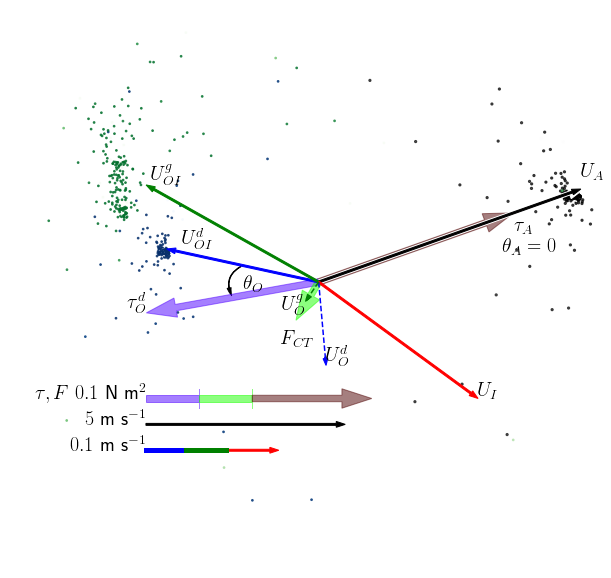

In [379]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-03/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# make a pretty cartoon
f = plt.figure(figsize=[10,10])
plt.rc('text', usetex=True)
nb =0
wnd_range = 7.0
wnd_scale = 0.03
plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])

# # inversions if I want them....
plt.scatter(wnd_scale*all_vecs[:,nb,0],wnd_scale*all_vecs[:,nb,1],c=np.log(np.log(all_vecs[:,nb,6])),s=5,cmap='Greys_r',alpha=0.7)
plt.scatter(all_vecs[:,nb,2],all_vecs[:,nb,3],c=np.log(np.log(all_vecs[:,nb,6])),s=3,cmap='Blues_r',alpha=0.8)
plt.scatter(all_vecs[:,nb,4],all_vecs[:,nb,5],c=np.log(np.log(all_vecs[:,nb,6])),s=3,cmap='Greens_r',alpha=0.8)
plt.clim(np.log(np.log([cmin,misfit_cut*1e0])))

plt.arrow(-0.13,-0.13,0.1,0,
              color='r',width = 0.0015,length_includes_head = 'true')
plt.plot([-0.13,-0.1],[-0.13,-0.13],'b',linewidth = 5)
plt.plot([-0.1,-0.07],[-0.13,-0.13],'g',linewidth = 5)
plt.text(-0.13,-0.13,
             r'$0.1$ m s$^{-1}$',fontsize=20,horizontalalignment='right')



# tauA tauOd tauOg
force_scale=1.7
plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               length_includes_head = 'true',color=[0.3,0,0],alpha=0.5,width=0.0050)
plt.text(force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1]*0.7,
             r'$\tau_A$',fontsize=20,horizontalalignment='left')
plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               length_includes_head = 'true',color=[0.3,0,1],alpha=0.5,width=0.0050)
plt.text(force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
             r'$\tau_O^d$',fontsize=20,horizontalalignment='right')
plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               length_includes_head = 'true',color=[0.1,1,0],alpha=0.5,width=0.0050)
plt.text(force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5]-0.02,
             r'$F_{CT}$',fontsize=20,horizontalalignment='center')

plt.arrow(-0.13,-0.09,0.04,0,head_length = 0,
              alpha=0.5,color=[0.3,0,1],width = 0.005,length_includes_head = 'true',)
plt.arrow(-0.09,-0.09,0.04,0,head_length = 0,
              alpha=0.5,color=[0.1,1,0],width = 0.005,length_includes_head = 'true',)
plt.arrow(-0.05,-0.09,force_scale*leg_len[nb]*1e0-0.08,0,
              alpha=0.5,color=[0.3,0,0],width = 0.005,length_includes_head = 'true')
plt.text(-0.13,-0.09,
            r'$\tau,F$  $0.1$ N m$^2$',fontsize=20,horizontalalignment='right')

# UA UOId UOIg
plt.arrow(-0.13,-0.11,5*wnd_scale,0,
              color='k',width = 0.0015,length_includes_head = 'true')
plt.text(-0.13,-0.11,
             r'$5$ m s$^{-1}$',fontsize=20,horizontalalignment='right')
#     #   original vectors
plt.arrow(0,0,1.02*wnd_scale*uwind_p,1.02*wnd_scale*vwind_p,
          color=[1,1,1],length_includes_head = 'true',width=0.003)
plt.arrow(0,0,wnd_scale*uwind_p,wnd_scale*vwind_p,
          color='k',length_includes_head = 'true',width=0.0015)
plt.text(1.00*wnd_scale*uwind_p,1.1*wnd_scale*vwind_p,
             r'$U_A$',fontsize=20,horizontalalignment='left')
plt.text(0.7*wnd_scale*uwind_p,0.3*wnd_scale*vwind_p+0.0,
             r'$\theta_A = 0$',fontsize=20,horizontalalignment='left')
plt.arrow(0,0,uo_i_p,vo_i_p,
              color='b',length_includes_head = 'true',width=0.0015)
plt.text(0.7*uo_i_p,vo_i_p,
             r'$U_{OI}^d$',fontsize=20,horizontalalignment='right')
plt.text(0.5*uo_i_p,0.5*vo_i_p-0.02,
             r'$\theta_O$',fontsize=20,horizontalalignment='left')
plt.arrow(0,0,ugeo_p,vgeo_p,
              color='g',length_includes_head = 'true',width=0.0015)
plt.text(0.8*ugeo_p,vgeo_p,
             r'$U_{OI}^g$',fontsize=20,horizontalalignment='right')
# UI UOd UOg
plt.arrow(0,0,uice,vice,
              color='r',length_includes_head = 'true',width=0.0015)
plt.text(uice,vice,
             r'$U_{I}$',fontsize=20,horizontalalignment='left')
plt.arrow(0.9*(uo_i_p+uice),0.9*(vo_i_p+vice),0.1*(uo_i_p+uice),0.1*(vo_i_p+vice),
              color='b',length_includes_head = 'true',width=0.0012)
plt.plot([0,0.9*(uo_i_p+uice)],[0,0.9*(vo_i_p+vice)],'b--')
plt.text(uo_i_p+uice,vo_i_p+vice,
             r'$U_{O}^d$',fontsize=20,horizontalalignment='left')
plt.arrow(0.9*(ugeo_p+uice),0.9*(vgeo_p+vice),0.1*(ugeo_p+uice),0.1*(vgeo_p+vice),
              color='g',length_includes_head = 'true',width=0.0012)
plt.plot([0,0.9*(ugeo_p+uice)],[0,0.9*(vgeo_p+vice)],'g--')
# plt.arrow(0,0,ugeo_p+uice,vgeo_p+vice,
#               color='g',ls='dashed',length_includes_head = 'true',width=0.0010)
plt.text(ugeo_p+uice,vgeo_p+vice-0.01,
             r'$U_{O}^g$',fontsize=20,horizontalalignment='right')

# curved thO angle
style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")

a3 = patches.FancyArrowPatch((uo_i_p/2,vo_i_p/2), (force_scale*orig_forces[nb,2]/2,force_scale*orig_forces[nb,3]/2)
                             ,connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(a3)
# arrow scales
plt.axis('off')
f.savefig(fig_location+'arrows_cartoon+noisey_inv.pdf',format='pdf',bbox__inches='tight')
plt.show()

In [287]:
np.hypot(orig_forces[:,4],orig_forces[:,5])

array([ 0.0200823 ,  0.04067147,  0.01756733,  0.00661385,  0.00669428,
        0.00695989,  0.00444056,  0.00675735,  0.02464894,  0.00916863])

In [307]:
print(geo_mag[0])
for i in range(nbals):
    uwind[i] = uwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    vwind[i] = vwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    wind_mag[i]     = np.hypot(uwind[i],vwind[i])
    uo_i[i] = uo_i[i]+np.random.normal(loc=0,scale=o_i_sig[i])
    vo_i[i] = vo_i[i]+np.random.normal(loc=0,scale=o_i_sig[i])
    o_i_mag[i]     = np.hypot(uo_i[i],vo_i[i])
    ugeo[i] = ugeo[i]+np.random.normal(loc=0,scale=geo_sig[i])
    vgeo[i] = vgeo[i]+np.random.normal(loc=0,scale=geo_sig[i])
    geo_mag[i]     = np.hypot(ugeo[i],vgeo[i])
print(geo_mag[0])

0.15
0.15102642287


In [308]:
# try some scaling factors
Na2_scale = 0.020**2
beta_a = np.ndarray([nbals])
beta_i = np.ndarray([nbals])
beta_g = np.ndarray([nbals])
beta_fb= np.ndarray([nbals])
# for i in range(nbals):
#     beta_a[i] = o_i_mag[i]**-2*Na2_scale**3
#     beta_i[i] = wind_mag[i]**-2*Na2_scale
#     beta_g[i] = wind_mag[i]**-2*Na2_scale
#     beta_fb[i]= wind_mag[i]**-4

# ### try some scaling factors
# Na2_scale = 0.015**2
# beta_a = np.ndarray([nbals])
# beta_i = np.ndarray([nbals])
# beta_w = np.ndarray([nbals])
# beta_fb= np.ndarray([nbals])
for i in range(nbals):
    beta_a[i] = 1.0e0 # ice_ocn_mag[i]**-2*Na2_scale**3
    beta_i[i] = 1.0e0 # iwind_mag[i]**-2*Na2_scale
    beta_g[i] = 0.0e0 # iwind_mag[i]**-2*Na2_scale
    beta_fb[i]= 1.0e0 # iwind_mag[i]**-4

# aggregate errors - bad winds mean bad everything
wind_sig_use = np.ndarray([nbals])
o_i_sig_use = np.ndarray([nbals])
geo_sig_use = np.ndarray([nbals])
for i in range(nbals):
    wind_sig_use[i] = wind_sig[i]
    o_i_sig_use[i] = np.maximum(wind_sig[i]/wind_mag[i],o_i_sig[i]/o_i_mag[i])*o_i_mag[i]
    geo_sig_use[i] = np.maximum(wind_sig[i]/wind_mag[i],geo_sig[i]/geo_mag[i])*geo_mag[i]
    o_i_sig_use[i] = o_i_sig[i]
    geo_sig_use[i] = geo_sig[i]
    print([wind_sig_use[i],o_i_sig_use[i],geo_sig_use[i]])
#     wind_sig_use[i]= wind_mag[i]
#     o_i_sig_use[i] = o_i_mag[i]
#     geo_sig_use[i] = geo_mag[i]

[0.070000000000000007, 0.0011724634059237645, 0.0015]
[0.11174877178930885, 0.0020047689721890507, 0.00050000000000000001]
[0.096786188163347012, 0.0017399144847842769, 0.00066679772291399625]
[0.1627986667246239, 0.0029289036701835298, 0.0013067096442591086]
[0.1662185344347443, 0.0029968205085428908, 0.00076772507390042118]
[0.0050000000000000001, 0.00027529200008335228, 0.00063601497226103889]
[0.15579229639560929, 0.002815877091792695, 0.0011478705167064151]
[0.072617401288152, 0.0012152807503124123, 0.001107532805255233]
[0.086263963761959939, 0.0014830622648226652, 0.0012945091063388326]
[0.090967133158401103, 0.0016272821301800888, 0.00055504764349087942]


In [309]:
its = 25
it1 = 400
itn = 100
res = 5

# open na.in
# Open file
f = open(location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
# its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
# it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
# itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
# res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()
# print(its,it1,itn,res)

# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

In [310]:
# write freedrift_IC
data_in = np.ndarray([nbals*17+12],dtype='float32')
r = 0;
data_in[r] = nbals;r+=1
# wind data
data_in[r:r+nbals] = uwind;r+=nbals
data_in[r:r+nbals] = vwind;r+=nbals
data_in[r:r+nbals] = wind_mag;r+=nbals
data_in[r:r+nbals] = wind_sig_use;r+=nbals
# o_i data
data_in[r:r+nbals] = uo_i;r+=nbals
data_in[r:r+nbals] = vo_i;r+=nbals
data_in[r:r+nbals] = o_i_mag;r+=nbals
data_in[r:r+nbals] = o_i_sig_use;r+=nbals
# geo data
data_in[r:r+nbals] = ugeo;r+=nbals
data_in[r:r+nbals] = vgeo;r+=nbals
data_in[r:r+nbals] = geo_mag;r+=nbals
data_in[r:r+nbals] = geo_sig_use;r+=nbals
# scaling betas
data_in[r:r+nbals] = beta_a ;r+=nbals
data_in[r:r+nbals] = beta_i ;r+=nbals
data_in[r:r+nbals] = beta_g ;r+=nbals
data_in[r:r+nbals] = beta_fb;r+=nbals
# other data/constants
data_in[r:r+nbals] = hifc;r+=nbals
data_in[r] = rhoa ;r+=1
data_in[r] = rhoi ;r+=1
data_in[r] = rhoo ;r+=1
# special for range
data_in[r] = n2a_min;r+=1
data_in[r] = n2a_max;r+=1
data_in[r] = rop_min;r+=1
data_in[r] = rop_max;r+=1
data_in[r] = thA_min;r+=1
data_in[r] = thA_max;r+=1
data_in[r] = thO_min;r+=1
data_in[r] = thO_max;r+=1
# data_in[r] = thA_min/2;r+=1
# data_in[r] = thA_max/2;r+=1
# data_in[r] = thO_min/2;r+=1
# data_in[r] = thO_max/2;r+=1
f = open(location+'/freedrift_IC','wb')
data_in.tofile(f,sep=' ')
f.close()

In [311]:
# now run the model - freedrift_na
! bin/freedrift_na 

# convert output to ascii nad2asc
! ./nad2asc na.nad na.asc

# read output
data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])

##### filter misfits
misfit_filter = 1e8
misfit_min = data_NA['misfit'][0]
misfit_ratio = 0.25
misfit_max = 0.0
misfit_min_no = 0
for i in data_NA['number'][0:-1]:
    if data_NA['misfit'][i] < misfit_min:
        misfit_min = data_NA['misfit'][i]
        misfit_min_no = i
    if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
        misfit_max = data_NA['misfit'][i]
misfit_range = misfit_max/misfit_min

misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
# number_cut = int(3*data_NA['number'][-1]/4)
number_cut = 0
data_NA_cut = np.empty([6,data_NA['number'][-1]])
#
i_cut = -1
for i in data_NA['number'][number_cut:-1]:
    if data_NA['misfit'][i] < misfit_cut:
        i_cut += 1
        data_NA_cut[0,i_cut] = data_NA['number'][i]
        data_NA_cut[1,i_cut] = data_NA['Na'][i]
        data_NA_cut[2,i_cut] = data_NA['Ro'][i]
        data_NA_cut[3,i_cut] = data_NA['thO'][i]
        data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
        data_NA_cut[5,i_cut] = data_NA['misfit'][i]
print(i_cut, misfit_min_no,np.mean(data_NA_cut[5,0:i_cut+1]))


  User routines output

  Opening freedrift files...

 Number of balances this time  =    10.0000000              10

  Successfuly read  freedrift files...


  Imposed Parameter space

  nd = 4, Ca, thetaA, Co, thetaO

  Adjusted Parameter space

  nd = 4, Na, Ro,  thetaA, thetaO

  Adjusted Parameter space 2

  nd = 4, Na2, Ro_p,  thetaO, thetaA - thetaOO

  Now invert           10  problems with same parameters
  Problem            1
  Wind_mag =    6.82335615    
  I_O_mag  =   0.117211804    
  GEO_mag  =   0.151026428    
  Problem            2
  Wind_mag =    11.2122345    
  I_O_mag  =   0.201264068    
  GEO_mag  =    4.97115031E-02
  Problem            3
  Wind_mag =    9.70514774    
  I_O_mag  =   0.174648419    
  GEO_mag  =    6.61376864E-02
  Problem            4
  Wind_mag =    16.1042385    
  I_O_mag  =   0.297364503    
  GEO_mag  =   0.130884871    
  Problem            5
  Wind_mag =    16.5690136    
  I_O_mag  =   0.298240095    
  GEO_mag  =    7.59450346E-02
 

2569 2846 159207.062244


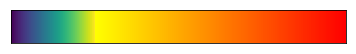

In [312]:
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [313]:
# want the medain of all from data_NA_cut
# first Na2
nansen_calc = st.median(data_NA_cut[1,0:i_cut])
rossby_calc = st.median(data_NA_cut[2,0:i_cut])
thO_calc    = st.median(data_NA_cut[3,0:i_cut])
thA_O_calc  = st.median(data_NA_cut[4,0:i_cut])
print('Nansen set',np.sqrt(nansen_use),'and calculated',np.sqrt(data_NA['Na'][misfit_min_no]),np.sqrt(nansen_calc))
print('Rossby set',rossby_use,'and calculated',data_NA['Ro'][misfit_min_no],rossby_calc)
print('ThetaA set',np.rad2deg(ThetaA),'and calculated',
      np.rad2deg(data_NA['thA-O'][misfit_min_no]+data_NA['thO'][misfit_min_no]),np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO set',np.rad2deg(ThetaO),'and calculated',np.rad2deg(data_NA['thO'][misfit_min_no]),np.rad2deg(thO_calc))
print('ThetaA - O set',np.rad2deg(ThetaA - ThetaO),'and calculated',np.rad2deg(data_NA['thA-O'][misfit_min_no]),np.rad2deg(thA_O_calc))
print('Ca calculated',(data_NA['Na'][misfit_min_no]/data_NA['Ro'][misfit_min_no])*(rhoi/rhoa))
print('Co calculated',(rhoi/rhoo)/data_NA['Ro'][misfit_min_no])
print('Ca calculated',(nansen_calc/rossby_calc*(rhoi/rhoa)))
print('Co calculated',(rhoi/rhoo)/rossby_calc)

Nansen set 0.0182282766358 and calculated 0.0182891195797 0.0187580227636
Rossby set 162.5022151337941 and calculated 150.138428 150.424698
ThetaA set 0.0 and calculated -0.943870675471 -1.09717424252
ThetaO set 23.0 and calculated 21.4778167255 21.5911842175
ThetaA - O set -23.0 and calculated -22.421687401 -22.68835846
Ca calculated 0.00163438006805
Co calculated 0.00595292088203
Ca calculated 0.00171598817798
Co calculated 0.00594159200663


In [314]:
# disassemble vectors
# forcing_1
vec_strd = 10
all_vecs = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+2),nbals,7])
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
# for j in range(misfit_min_no,misfit_min_no+1):
    for i in range(nbals):
        all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_mag_geo(
                          uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#                           np.pi,np.pi-data_NA['thA-O'][j])
        all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag_geo(
                          uwind[i],vwind[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#                           0,-data_NA['thA-O'][j])
#                           np.pi,np.pi-data_NA['thA-O'][j])
        all_vecs[jj,i,4],all_vecs[jj,i,5] = freedrift.geo_mag_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#                           0,-data_NA['thA-O'][j])
#                           np.pi,np.pi-data_NA['thA-O'][j])
        all_vecs[jj,i,6] = data_NA['misfit'][j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals):
    all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_mag_geo(
                      uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                      data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                      data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag_geo(
                      uwind[i],vwind[i],ugeo[i],vgeo[i],
                      data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                      data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,4],all_vecs[jj,i,5] = freedrift.geo_mag_geo(
                      uwind[i],vwind[i],uo_i[i],vo_i[i],
                      data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                      data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,6] = data_NA['misfit'][j]


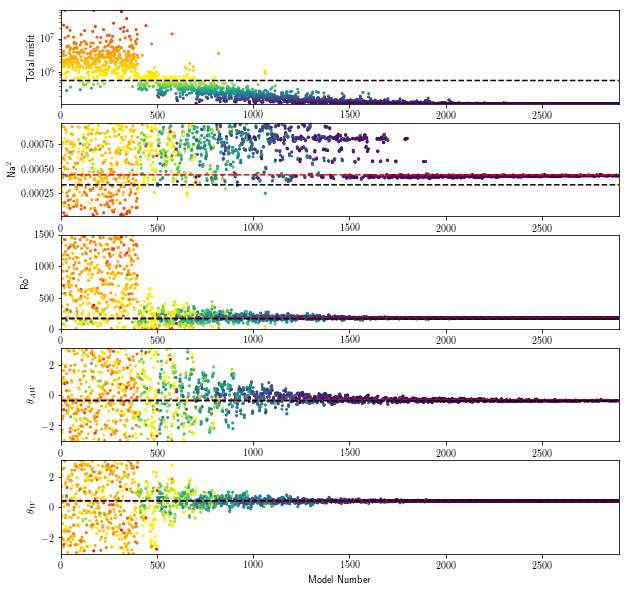

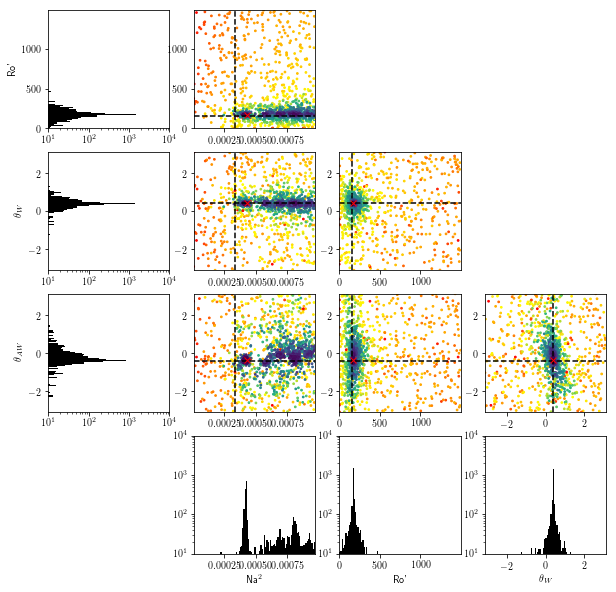

In [253]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-06-02/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# plot misfit
# cmin = 1e-10
# cmax = 1e2
plt.figure(figsize=[10,10])
plt.subplot(5,1,1)
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot(5,1,2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[nansen_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
# plt.savefig('misfit_all_100%.pdf')
plt.subplot(5,1,3)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[rossby_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.subplot(5,1,4)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaA-ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{AW}$')
plt.subplot(5,1,5)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{W}$')
plt.xlabel('Model Number')
plt.show()
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{W}$')
plt.subplot(4,4,9)
plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('Ro')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# x - Na y - thA
plt.subplot(4,4,6)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thO')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
plt.subplot(4,4,10)
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thA-O')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
plt.subplot(4,4,11)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - thA y - thO
plt.subplot(4,4,12)
plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_NA['Na'],bins=100,color='k')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(data_NA['thO'],bins=100,color='k')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'$\theta_{W}$')
# f.savefig(fig_location+'trade_off_geo_synth.pdf',format='pdf',bbox__inches='tight')
# f.savefig(fig_location+'trade_off_A_OI_FB.pdf',format='pdf',bbox__inches='tight')
plt.show()
# plt.savefig('trade_off_all_100%.pdf')


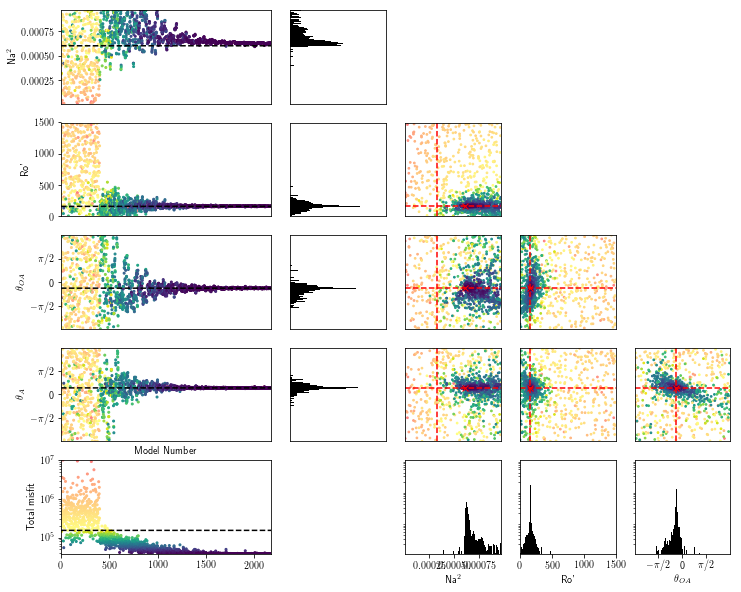

In [68]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-06-02/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# plot misfit
# cmin = 1e-10
# cmax = 1e2
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
# colors = np.vstack((colors1, colors2))
colors = np.vstack((colors1,1-(1-colors2)*0.5))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# plt.imshow([colors], extent=[0, 10, 0, 1])
# plt.xticks([])
# plt.yticks([])
# plt.show()

# plot misfit
# cmin = 1e-10
# cmax = 1e2
no_bins = 50
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
f=plt.figure(figsize=[12,10])
plt.subplot2grid([5,6],[0,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
plt.xticks([])
# plt.savefig('misfit_all_100%.pdf')
plt.subplot2grid([5,6],[1,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.xticks([])
plt.subplot2grid([5,6],[2,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{OA}$')
plt.yticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.xticks([])
plt.subplot2grid([5,6],[3,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{A}$')
# plt.yticks([0,np.pi/2,np.pi,3*np.pi/2],[0,r'$\pi /2$',r'$\pi $',r'$3\pi /2$'])
plt.yticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.xlabel('Model Number')
plt.xticks([])

plt.subplot2grid([5,6],[4,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.yscale('log')
# plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot2grid([5,6],[0,2])
plt.hist(data_NA['Na'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
# plt.ylabel(r'Na$^2$')
plt.yticks([])
plt.xticks([])
plt.subplot2grid([5,6],[1,2])
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
# plt.ylabel('Ro\'')
plt.yticks([])
plt.xticks([])
plt.subplot2grid([5,6],[2,2])
plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
# plt.ylabel(r'$\theta_{OI}$')
plt.xticks([])
plt.yticks([])
plt.subplot2grid([5,6],[3,2])
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.yticks([])
plt.xticks([])
# plt.ylabel(r'$\theta_{A}$')
# plt.yticks([])
# x - Na y - Ro

# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
# f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])
# horizontal hists
plt.subplot2grid([5,6],[1,3])
# plt.subplot(4,4,1)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--r')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--r')
plt.xticks([])
plt.yticks([])
# # x - Na y - thA
# plt.subplot(4,4,6)
plt.subplot2grid([5,6],[2,3])
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--r')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--r')
plt.xticks([])
plt.yticks([])
# # plt.ylabel('thA-O')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# # x - Ro y - thA
plt.subplot2grid([5,6],[2,4])
# plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--r')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--r')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
plt.xticks([])
plt.yticks([])
# # x - Na y - thO
# plt.subplot(4,4,10)
plt.subplot2grid([5,6],[3,3])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.ylabel('thO')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--r')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--r')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# # x - Ro y - thO
# plt.subplot(4,4,11)
plt.subplot2grid([5,6],[3,4])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--r')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--r')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# # x - thA y - thO
# plt.subplot(4,4,12)
plt.subplot2grid([5,6],[3,5])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['thA-O'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],[i*th1 for i in [1,1]],'--r')
plt.plot([i*th2 for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--r')
plt.plot(data_NA['thA-O'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# # bottom row histograms
# plt.subplot(4,4,14)
plt.subplot2grid([5,6],[4,3])
plt.hist(data_NA['Na'],bins=100,color='k')
plt.yscale('log')
plt.xlim([1e1,1e4])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.xlabel(r'Na$^2$')
plt.ylim([1e1,1e4])
plt.yticks([])
# plt.subplot(4,4,15)

plt.subplot2grid([5,6],[4,4])
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.yscale('log')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xlabel('Ro\'')
plt.ylim([1e1,1e4])
plt.yticks([])

plt.subplot2grid([5,6],[4,5])
plt.hist(data_NA['thA-O'],bins=100,color='k')
plt.yscale('log')
# ax =plt.subplot(4,4,16)
plt.xlim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xlabel(r'$\theta_{OA}$')
plt.xticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.ylim([1e1,1e4])
plt.yticks([])
# plt.subplot(4,4,14)
# plt.hist(data_NA['Na'],bins=100,color='k')
# plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
# plt.axvline(inv_data_d[dd,7],color='g')
# plt.axvline(inv_data_d[dd,8],color='g')
# plt.axvline(inv_data_d[dd,9],color='g')
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel(r'Na$^2$')
# plt.subplot(4,4,15)
# plt.hist(data_NA['Ro'],bins=100,color='k')
# plt.axvline(inv_data_d[dd,10],color='g')
# plt.axvline(inv_data_d[dd,11],color='g')
# plt.axvline(inv_data_d[dd,12],color='g')
# plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel('Ro\'')
# plt.subplot(4,4,16)
# plt.hist(data_NA['thO'],bins=100,color='k')
# plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
# plt.axvline(inv_data_d[dd,13],color='g')
# plt.axvline(inv_data_d[dd,14],color='g')
# plt.axvline(inv_data_d[dd,15],color='g')
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel(r'$\theta_{W}$')
f.savefig(fig_location+'trade_off_BIG_synthetic.pdf',format='pdf',bbox__inches='tight')
plt.show()

In [ ]:
# want arrows for the obs and best, scatter all the rest with mymap
wnd_range = np.max(wind_mag)
wnd_range = 0.99*np.max(np.maximum(all_vecs[-1,:,0:2],wnd_range))
wnd_scale = 0.04
plt.figure(figsize=[20,5*nbals])
plt.rc('text', usetex=True)
for nb in range(nbals):
# for nb in range(nbals):
    ax = plt.subplot(nbals/2,2,nb+1)
#     #   calculated vectors
    # wind
    plt.scatter(wnd_scale*all_vecs[:,nb,0],wnd_scale*all_vecs[:,nb,1],c=np.log(all_vecs[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(all_vecs[:,nb,2],all_vecs[:,nb,3],c=np.log(all_vecs[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(all_vecs[:,nb,4],all_vecs[:,nb,5],c=np.log(all_vecs[:,nb,6]),s=3,cmap=mymap)
    plt.clim(np.log([cmin,cmax]))
# #     for j in tqdm(range(0,data_NA['number'][-1],10)):
# #         plt.arrow(0,0,wnd_scale*all_vecs[j,nb,0],wnd_scale*all_vecs[j,nb,1],
# #                    alpha=0.009,color='k')
# #         plt.arrow(0,0,all_vecs[j,nb,2],all_vecs[j,nb,3],
# #                    alpha=0.009,color='b')
# #         plt.arrow(0,0,all_vecs[j,nb,4],all_vecs[j,nb,5],
# #                    alpha=0.009,color='g')
    plt.arrow(0,0,wnd_scale*all_vecs[-1,nb,0],wnd_scale*all_vecs[-1,nb,1],
               length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7)
    plt.arrow(0,0,all_vecs[-1,nb,2],all_vecs[-1,nb,3],
               length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7)
    plt.arrow(0,0,all_vecs[-1,nb,4],all_vecs[-1,nb,5],
               length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.7)
#     #   original vectors
    plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],
              color='k',length_includes_head = 'true',width=0.0015)
    plt.arrow(0,0,uo_i[nb],vo_i[nb],
              color='b',length_includes_head = 'true',width=0.0015)
    plt.arrow(0,0,ugeo[nb],vgeo[nb],
              color='g',length_includes_head = 'true',width=0.0015)
    plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
# #     plt.arrow(-wnd_scale/2,-wind_mag[nb]*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wind_mag[nb]*wnd_scale/4,wnd_scale,0,
# # #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-wnd_range*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wnd_range*wnd_scale/4,wnd_scale,0,
# #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.text(wnd_scale,-wind_mag[nb]*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
# #     plt.text(wnd_scale,-3*wind_mag[nb]*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-wnd_range*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-3*wnd_range*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
    ax.axis('off')
plt.show()

In [438]:
# disassemble misfits
vec_strd = 10
all_misfits = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd),nbals,5])
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
    for i in range(nbals):
        all_misfits[jj,i,0] = freedrift.misfit_wnd_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_a[i]/wind_sig_use[i]**2
        all_misfits[jj,i,1] = freedrift.misfit_o_i_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_i[i]/o_i_sig_use[i]**2
        all_misfits[jj,i,2] = freedrift.misfit_geo_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_g[i]/geo_sig_use[i]**2
        fb_ratio = np.max([wind_sig_use[i]/wind_mag[i],
                     o_i_sig_use[i]/o_i_mag[i], 
                     geo_sig_use[i]/geo_mag[i]]) 
        all_misfits[jj,i,3] = freedrift.misfit_fb_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]/rhoi,
                          rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_fb[i]/fb_ratio**2
        all_misfits[jj,i,4] = data_NA['misfit'][j]
    jj += 1

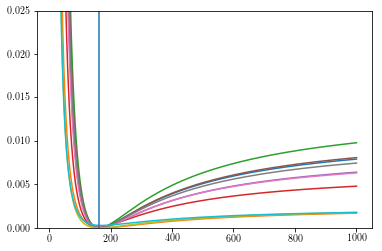

In [425]:
test_space = np.linspace(1e1,1e3,1000)
test_result = np.empty([1000,nbals])
i = 10
j = misfit_min_no
for k in range(1000):
    for i in range(nbals):
        test_result[k,i] =  freedrift.misfit_geo_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
#                           data_NA['Na'][j],test_space[k]*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                          nansen_use,test_space[k]*hifc[i],
                          ThetaA,ThetaO
                )

plt.plot(test_space,test_result[:,:])
plt.ylim([0,0.025])
# plt.axvline(x=data_NA['Ro'][j])
plt.axvline(x=rossby_use)
plt.show()

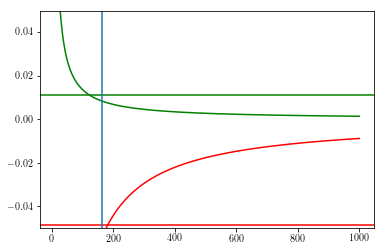

In [426]:
test_space = np.linspace(1e1,1e3,1000)
test_result = np.empty([1000,2])
i = 1
j = misfit_min_no
for k in range(1000):
    test_result[k,:] =  freedrift.geo_mag_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],
#                           data_NA['Na'][j],test_space[k]*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                          nansen_use,test_space[k]*hifc[i],
                          ThetaA,ThetaO
                )
plt.plot(test_space,test_result[:,0],'r')
plt.plot(test_space,test_result[:,1],'g')
plt.axhline(y=1*ugeo[i],c='r')
plt.axhline(y= vgeo[i],c='g')
plt.axvline(x=rossby_use)
plt.ylim([-0.05,0.05])
plt.show() 

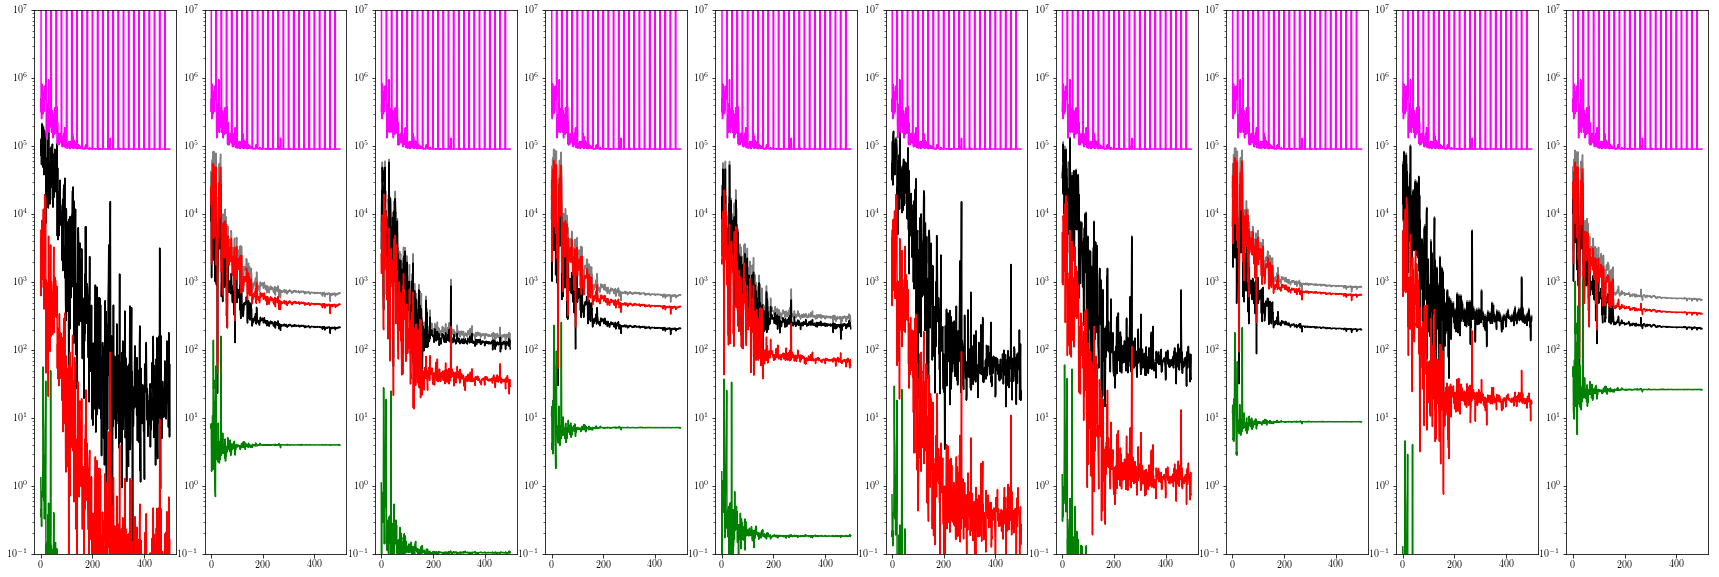

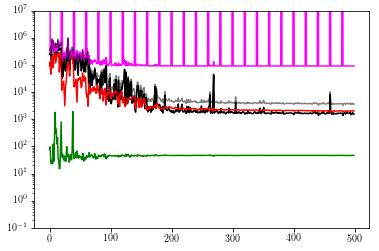

In [439]:
# plot misfit
plt.figure(figsize=[30,10])
cmin = 1e-1
# cmin = misfit_min*1e-3
# cmin = 1e-4
# cmax = misfit_max
cmax = 1e7
# cmin = 1e-12
for i in range(nbals):
    plt.subplot(1,nbals,i+1)
# for i in range(0,3):
#     plt.subplot(1,3,i+1)
    plt.plot(all_misfits[:,i,0],alpha = 1.0,c='k')
    plt.plot(np.sum(all_misfits[:,i,0:3],axis=1),c='k',alpha=0.5)
    plt.plot(all_misfits[:,i,1],alpha = 1.0,c='r')
    plt.plot(all_misfits[:,i,2],alpha = 1.0,c='b')
    plt.plot(all_misfits[:,i,3],alpha = 1.0,c='g')
    plt.plot(all_misfits[:,1,4],c=[1,0,1])
    plt.yscale('log')
    plt.ylim([cmin,cmax])
plt.show()

plt.plot(np.sum(all_misfits[:,:,0],axis=1),c='k')
plt.plot(np.sum(all_misfits[:,:,1],axis=1),c='r')
plt.plot(np.sum(all_misfits[:,:,2],axis=1),c='b')
plt.plot(np.sum(all_misfits[:,:,3],axis=1),c='g')
plt.plot(all_misfits[:,0,4],c=[1,0,1])
plt.plot(np.sum(np.sum(all_misfits[:,:,0:4],axis=2),axis=1),c='k',alpha=0.5)
plt.ylim([cmin,cmax])
plt.yscale('log')
# plt.savefig('misfit_sep_100%.pdf')
plt.show()

In [379]:
# disassemble forces
# forcing_1
all_forces = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+1),nbals,7])
# for j in tqdm(data_NA['number']-1):
# for j in range(data_NA['number'][-1]-10,data_NA['number'][-1]-1):
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
# for j in range(misfit_min_no-1,misfit_min_no+1):
    for i in range(nbals):
        [all_forces[jj,i,0],all_forces[jj,i,1],all_forces[jj,i,2],
         all_forces[jj,i,3],all_forces[jj,i,4],all_forces[jj,i,5]] = freedrift.force_bal_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_forces[jj,i,:] = freedrift.force_bal(
#                           all_vecs[jj,i,0],all_vecs[jj,i,1],all_vecs[jj,i,2],all_vecs[jj,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_forces[jj,i,6] = data_NA['misfit'][j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals):
    [all_forces[jj,i,0],all_forces[jj,i,1],all_forces[jj,i,2],
     all_forces[jj,i,3],all_forces[jj,i,4],all_forces[jj,i,5]] = freedrift.force_bal_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#                           0,-data_NA['thA-O'][j])
#         all_forces[jj,i,:] = freedrift.force_bal(
#                           all_vecs[jj,i,0],all_vecs[jj,i,1],all_vecs[jj,i,2],all_vecs[jj,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_forces[jj,i,6] = data_NA['misfit'][j] 
    

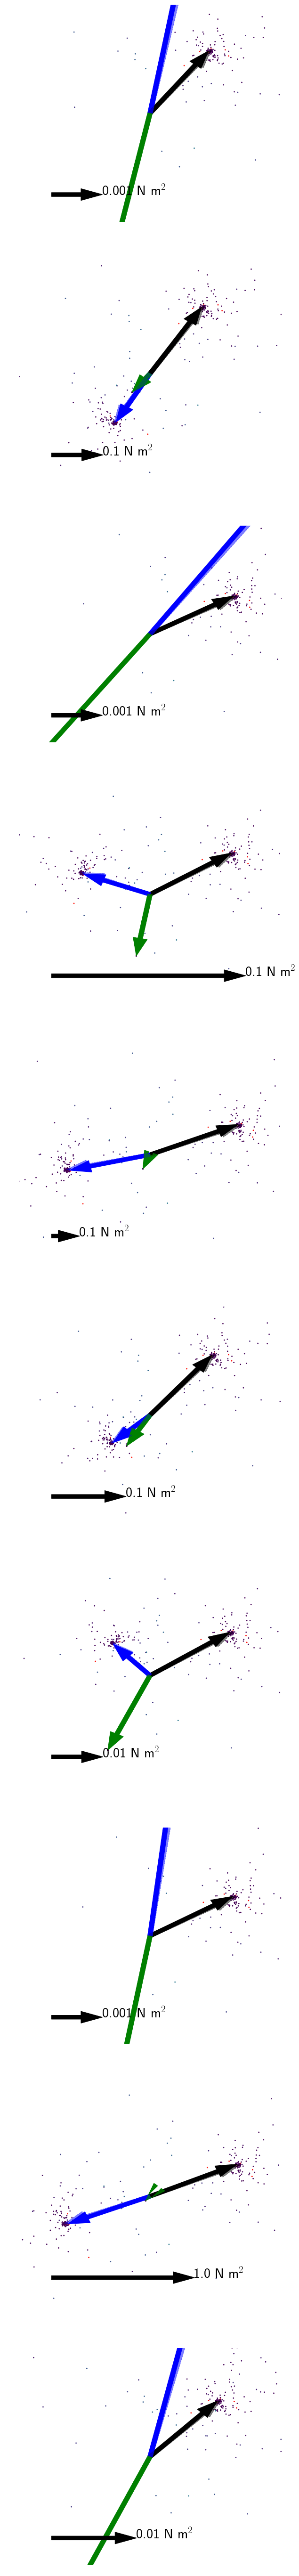

In [380]:
leg_len = np.ndarray([nbals])
for i in range(nbals):
    leg_len[i] = 10.0**np.ceil(np.log10((np.hypot(all_forces[-1,i,0],all_forces[-1,i,1]))))
# leg_len

wnd_scale = 55
force_scale = 40
plt.figure(figsize=[10,10*nbals])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
   
    ax = plt.subplot(nbals,1,nb+1)
#     plt.subplot(1,1,1)

    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               color='b',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               color='g',width = force_magw[nb]*2,length_includes_head = 'true')

    plt.arrow(0,0,force_scale*all_forces[-1,nb,0],force_scale*all_forces[-1,nb,1],
               linestyle='dashed',color='k',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[-1,nb,2],force_scale*all_forces[-1,nb,3],
               linestyle='dashed',color='b',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[-1,nb,4],force_scale*all_forces[-1,nb,5],
               linestyle='dashed',color='g',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.scatter(force_scale*all_forces[:,nb,0],force_scale*all_forces[:,nb,1],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(force_scale*all_forces[:,nb,2],force_scale*all_forces[:,nb,3],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(force_scale*all_forces[:,nb,4],force_scale*all_forces[:,nb,5],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
#     #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-ui_o[nb],-vi_o[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.arrow(-3*wnd_scale*force_magw[nb]/4,-3*wnd_scale*force_magw[nb]/4,leg_len[nb]*1e1,0,
              color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.text(-3*wnd_scale*force_magw[nb]/4+leg_len[nb]*1e1,-3*wnd_scale*force_magw[nb]/4,
             str(leg_len[nb])+' N m$^2$',fontsize=30,horizontalalignment='left')
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],0.02)))]) 
    ax.axis('off')
plt.show()